## Importing Necesaary Libraries

In [69]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

import warnings 
warnings.filterwarnings("ignore")

## Import Dataset

In [70]:
company_data = pd.read_csv('Company_Data.csv')
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## Initial Analysis

In [71]:
company_data.shape

(400, 11)

In [72]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


## Data Processing / Data Preperation

In [73]:
col = list(company_data.columns)
col

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [74]:
company_data = pd.get_dummies(company_data)
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [75]:
company_data = company_data.drop(['ShelveLoc_Bad','ShelveLoc_Medium','Urban_No','US_No'],axis=1)

In [76]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,1,1
1,11.22,111,48,16,260,83,65,10,1,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1
4,4.15,141,64,3,340,128,38,13,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1,1
396,6.14,139,23,3,37,120,55,11,0,0,1
397,7.41,162,26,12,368,159,40,18,0,1,1
398,5.94,100,79,7,284,95,50,12,0,1,1


In [77]:
company_data = company_data.rename({'ShelveLoc_Good' : 'ShelveLoc' , 'Urban_Yes' : 'Urban' , 'US_Yes' : 'US'},axis = 1)

In [78]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US
0,9.50,138,73,11,276,120,42,17,0,1,1
1,11.22,111,48,16,260,83,65,10,1,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1
4,4.15,141,64,3,340,128,38,13,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1,1
396,6.14,139,23,3,37,120,55,11,0,0,1
397,7.41,162,26,12,368,159,40,18,0,1,1
398,5.94,100,79,7,284,95,50,12,0,1,1


In [79]:
data = company_data.copy()


In [80]:
data['Status'] = data['Sales'].apply(lambda Sales: 'Low' if Sales <= 7.5 else 'High')

In [81]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US,Status
0,9.50,138,73,11,276,120,42,17,0,1,1,High
1,11.22,111,48,16,260,83,65,10,1,1,1,High
2,10.06,113,35,10,269,80,59,12,0,1,1,High
3,7.40,117,100,4,466,97,55,14,0,1,1,Low
4,4.15,141,64,3,340,128,38,13,0,1,0,Low


In [82]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in data.columns:
    print(i)
    if data[i].dtypes == object:
        data[i] = encoder.fit_transform(data[i])
    else:
        pass

Sales
CompPrice
Income
Advertising
Population
Price
Age
Education
ShelveLoc
Urban
US
Status


<AxesSubplot:xlabel='Income', ylabel='count'>

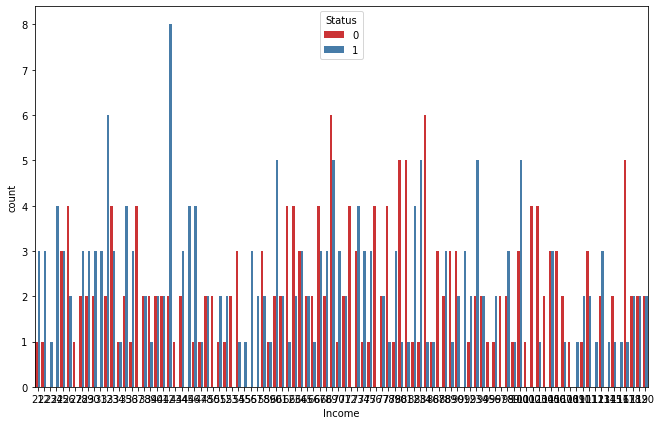

In [85]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'Income', hue = 'Status', data = data, palette = 'Set1')

<AxesSubplot:>

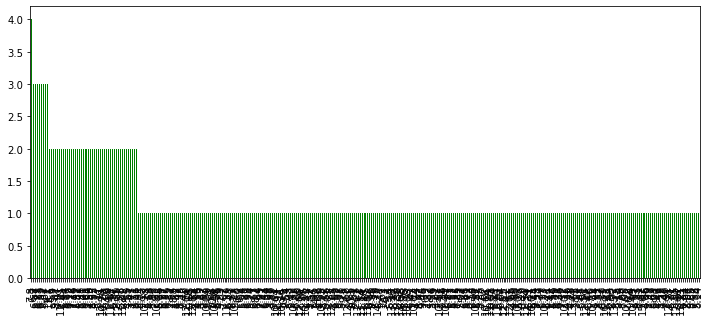

In [86]:
plt.figure(figsize = (12,5))
company_data.Sales.value_counts().plot.bar(color = 'green')

<AxesSubplot:>

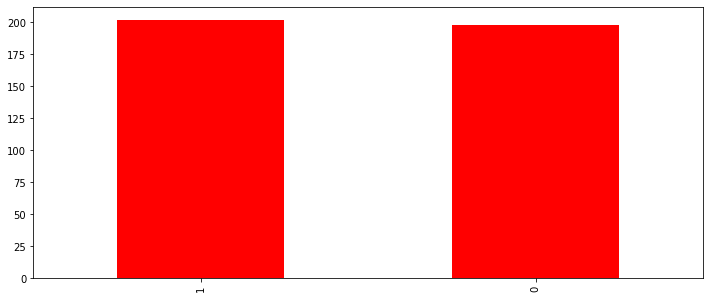

In [87]:
plt.figure(figsize = (12,5))
data.Status.value_counts().plot.bar(color = 'red')

<AxesSubplot:>

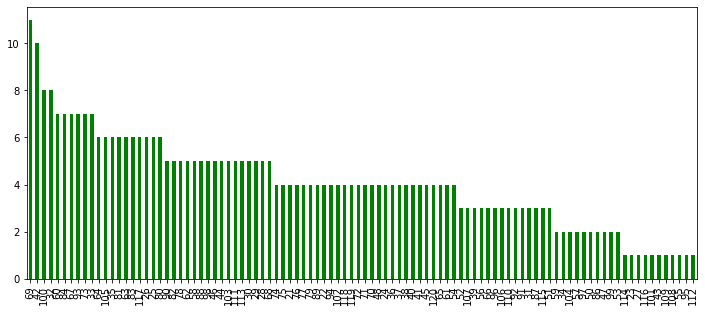

In [88]:
plt.figure(figsize = (12,5))
data.Income.value_counts().plot.bar(color = 'green')

<AxesSubplot:>

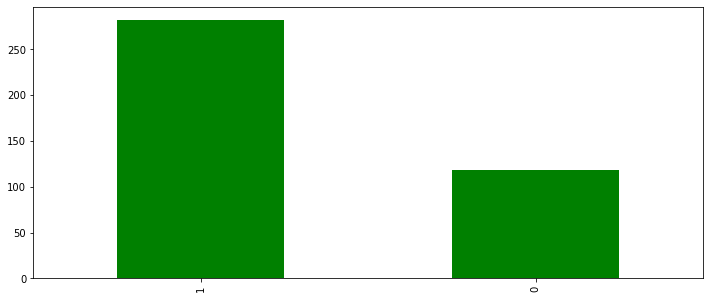

In [89]:
plt.figure(figsize = (12,5))
data.Urban.value_counts().plot.bar(color = 'green')

<AxesSubplot:>

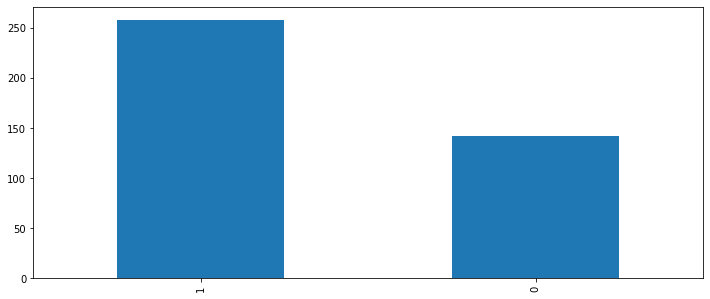

In [90]:
plt.figure(figsize = (12,5))
data.US.value_counts().plot.bar()

In [91]:
x = data.iloc[:, 0:10]
y = data.iloc[:,10]


In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=59)


## Building Decision Tree Classifier (C5.0)

In [104]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=59)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=59)

In [95]:
pred

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=uint8)

In [96]:
#Accuracy
np.mean(pred==y_test)

0.9333333333333333

[Text(141.64615384615385, 190.26, 'X[3] <= 0.5\nentropy = 0.937\nsamples = 280\nvalue = [99, 181]'),
 Text(51.50769230769231, 135.9, 'X[2] <= 36.0\nentropy = 0.639\nsamples = 105\nvalue = [88, 17]'),
 Text(25.753846153846155, 81.53999999999999, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(77.26153846153846, 81.53999999999999, 'X[4] <= 410.0\nentropy = 0.717\nsamples = 86\nvalue = [69, 17]'),
 Text(51.50769230769231, 27.180000000000007, 'entropy = 0.789\nsamples = 72\nvalue = [55, 17]'),
 Text(103.01538461538462, 27.180000000000007, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(231.7846153846154, 135.9, 'X[3] <= 6.5\nentropy = 0.339\nsamples = 175\nvalue = [11, 164]'),
 Text(180.27692307692308, 81.53999999999999, 'X[6] <= 30.5\nentropy = 0.722\nsamples = 45\nvalue = [9, 36]'),
 Text(154.52307692307693, 27.180000000000007, 'entropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(206.03076923076924, 27.180000000000007, 'entropy = 0.552\nsamples = 39\nvalue = [5, 34]'),
 T

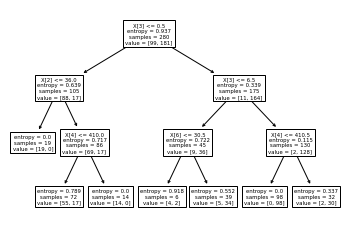

In [97]:
tree.plot_tree(model)

[Text(786.9230769230769, 990.9375, 'Advertising <= 0.5\nentropy = 0.937\nsamples = 280\nvalue = [99, 181]\nclass = High'),
 Text(286.15384615384613, 707.8125, 'Income <= 36.0\nentropy = 0.639\nsamples = 105\nvalue = [88, 17]\nclass = Low'),
 Text(143.07692307692307, 424.6875, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0]\nclass = Low'),
 Text(429.23076923076917, 424.6875, 'Population <= 410.0\nentropy = 0.717\nsamples = 86\nvalue = [69, 17]\nclass = Low'),
 Text(286.15384615384613, 141.5625, 'entropy = 0.789\nsamples = 72\nvalue = [55, 17]\nclass = Low'),
 Text(572.3076923076923, 141.5625, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]\nclass = Low'),
 Text(1287.6923076923076, 707.8125, 'Advertising <= 6.5\nentropy = 0.339\nsamples = 175\nvalue = [11, 164]\nclass = High'),
 Text(1001.5384615384614, 424.6875, 'Age <= 30.5\nentropy = 0.722\nsamples = 45\nvalue = [9, 36]\nclass = High'),
 Text(858.4615384615383, 141.5625, 'entropy = 0.918\nsamples = 6\nvalue = [4, 2]\nclass = Low'),
 Text(

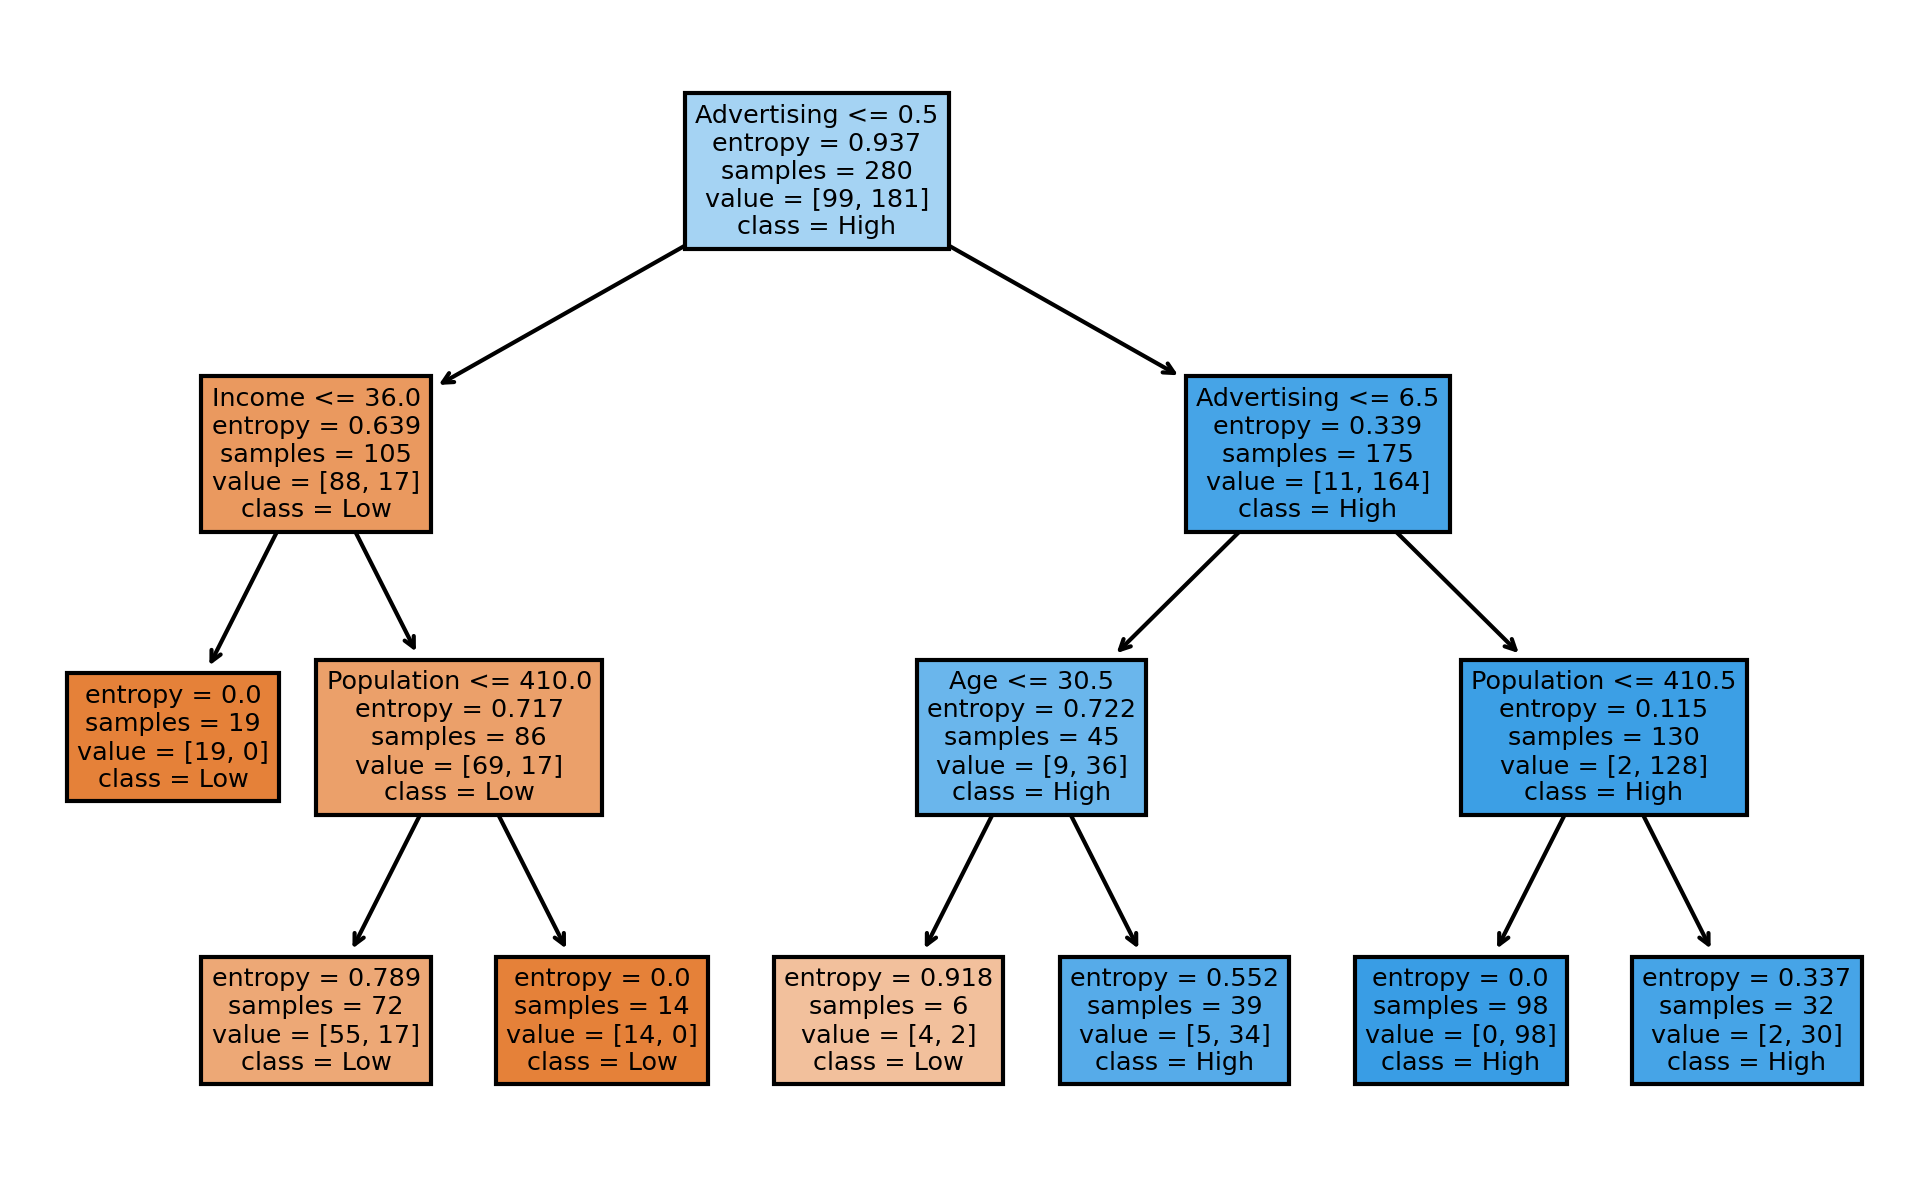

In [98]:
fn = data.columns
cn = ['Low', 'High']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (8,5), dpi=300)
tree.plot_tree(model, feature_names=fn, class_names=cn, filled=True)

## Building Decision Tree Classifier (CART) using Gini Criteria

In [99]:
model_gini1 = DecisionTreeClassifier(criterion='gini', max_depth=5)
model_gini1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [100]:
#Predicting on test data
pred_testg1 = model_gini1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg1==y_test))
#Predicting on train data
pred_traing1 = model_gini1.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing1==y_train))

Test data Accuracy is: 0.8916666666666667
Train data Accuracy is: 0.95


In [101]:
model_gini2 = DecisionTreeClassifier(criterion='gini', max_depth=6)
model_gini2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [102]:
#Predicting on test data
pred_testg2 = model_gini2.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg2==y_test))
#Predicting on train data
pred_traing2 = model_gini2.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing2==y_train))

Test data Accuracy is: 0.8583333333333333
Train data Accuracy is: 0.975


In [66]:
model_gini3 = DecisionTreeClassifier(criterion='gini', max_depth=7)
model_gini3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [67]:
#Predicting on test data
pred_testg3 = model_gini3.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg3==y_test))
#Predicting on train data
pred_traing3 = model_gini3.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing3==y_train))

Test data Accuracy is: 0.7166666666666667
Train data Accuracy is: 0.95


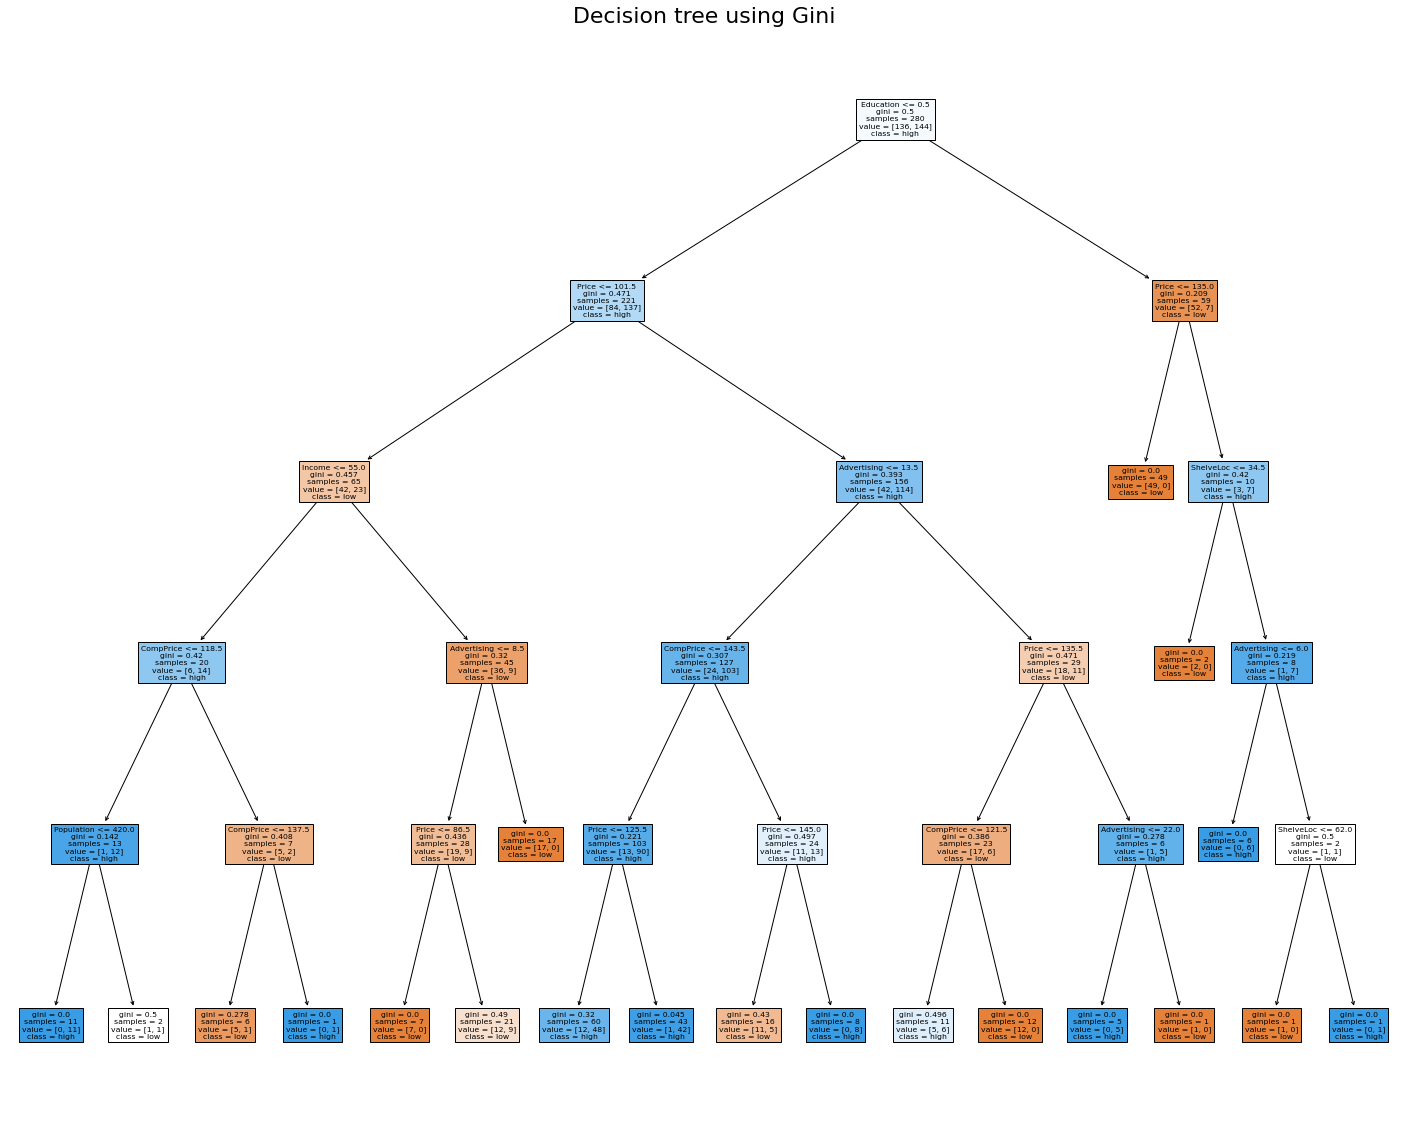

In [68]:
# let's plot the decision tree
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini1,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education', 
                                     'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Gini',fontsize=22)
plt.savefig('DT_Gini.pdf')